## Talluri Harshitha 

#### Task - 03 : Implement a SVM to classify Cats and Dogs from the kaggle Dataset

#### Dataset used:
https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification

#### Description:
I have used family of CNN models to extract featured from Images and used SVM to classify the Images as Dogs and Cats.
I experimented with VGG16, ResNet and MobileNet with Support Vector Machine(SVM). Out of which MobileNet with SVM stands out the best.

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define directories for training and test data
train_dir = r"C:\Users\HP\Downloads\archive (1)\train"
test_dir = r"C:\Users\HP\Downloads\archive (1)\test"

# Define image dimensions
img_width, img_height = 150, 150

# Use ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of training and test images
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode=None,  # We'll use this generator only for feature extraction, so we set class_mode to None
    shuffle=False)    # We don't shuffle the data since we want to keep track of filenames

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode=None,
    shuffle=False)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


### Using VGG16 to extract features

In [4]:
from tensorflow.keras.applications import VGG16
# Load pre-trained VGG16 model without the top (fully connected) layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Extract features using VGG16
train_features_vgg = base_model_vgg16.predict(train_generator)
test_features_vgg = base_model_vgg16.predict(test_generator)

# Flatten the features
train_features_vgg = np.reshape(train_features_vgg, (train_features_vgg.shape[0], -1))
test_features_vgg = np.reshape(test_features_vgg, (test_features_vgg.shape[0], -1))

# Get labels
train_labels = train_generator.classes
test_labels = test_generator.classes

# Create SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train SVM
svm_model.fit(train_features_vgg, train_labels)

# Evaluate SVM
accuracy_vgg = svm_model.score(test_features_vgg, test_labels)
print("Test Accuracy:", accuracy_vgg)




5/5 [==============================] - 10s 2s/step
Test Accuracy: 0.7642857142857142


### Using ResNet50 to extract features 

In [21]:
from tensorflow.keras.applications import ResNet50  # Import ResNet50

# Load pre-trained ResNet50 model without the top (fully connected) layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Extract features using ResNet50
train_features_resnet = base_model_resnet.predict(train_generator)
test_features_resnet = base_model_resnet.predict(test_generator)

# Flatten the features
train_features_resnet = np.reshape(train_features_resnet, (train_features.shape[0], -1))
test_features_resnet = np.reshape(test_features_resnet, (test_features.shape[0], -1))

# Get labels
train_labels = train_generator.classes
test_labels = test_generator.classes

# Create SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train SVM
svm_model.fit(train_features_resnet, train_labels)

# Evaluate SVM
accuracy_resnet = svm_model.score(test_features_resnet, test_labels)
print("Test Accuracy:", accuracy_resnet)


5/5 [==============================] - 5s 938ms/step
Test Accuracy: 0.6357142857142857


### Using MobileNet

In [22]:
from tensorflow.keras.applications import MobileNet 

# Load pre-trained ResNet50 model without the top (fully connected) layers
base_model_MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Extract features using ResNet50
train_features_MobileNet = base_model_MobileNet.predict(train_generator)
test_features_MobileNet = base_model_MobileNet.predict(test_generator)

# Flatten the features
train_features_MobileNet = np.reshape(train_features_MobileNet, (train_features.shape[0], -1))
test_features_MobileNet = np.reshape(test_features_MobileNet, (test_features.shape[0], -1))

# Get labels
train_labels = train_generator.classes
test_labels = test_generator.classes

# Create SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train SVM
svm_model.fit(train_features_MobileNet, train_labels)

# Evaluate SVM
accuracy_MobileNet = svm_model.score(test_features_MobileNet, test_labels)
print("Test Accuracy:", accuracy_MobileNet)


5/5 [==============================] - 2s 326ms/step
Test Accuracy: 0.8785714285714286


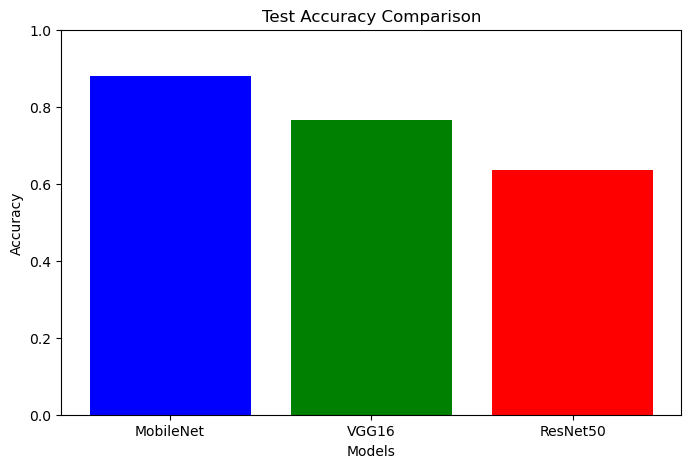

In [23]:
import matplotlib.pyplot as plt

# Define model names and their respective accuracies
model_names = ['MobileNet', 'VGG16', 'ResNet50']
accuracies = [accuracy_MobileNet, accuracy_vgg, accuracy_resnet]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title('Test Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()


## To take input from system

1/1 [==============================] - 0s 168ms/step


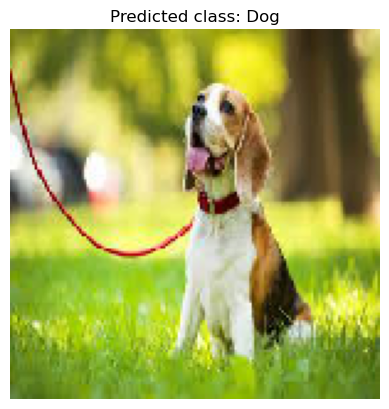

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the trained SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_model.fit(train_features_vgg, train_labels)

# Function to predict class for a single image
def predict_image_class(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using the pre-trained VGG16 model
    features = base_model_vgg16.predict(img_array)

    # Flatten the features
    features = np.reshape(features, (features.shape[0], -1))

    # Predict the class using the SVM model
    predicted_class = model.predict(features)[0]

    return predicted_class

# Function to display the predicted class and input image
def display_prediction(image_path, model):
    predicted_class = predict_image_class(image_path, model)
    if predicted_class == 1:
        prediction_label = "Dog"
    else:
        prediction_label = "Cat"
    
    # Load and display the input image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title("Predicted class: " + prediction_label)
    plt.axis('off')
    plt.show()

# Path to the image you want to classify
image_path = r"C:\Users\HP\Downloads\archive (1)\test\dogs\dog_354.jpg"

# Display the predicted class and input image
display_prediction(image_path, svm_model)


1/1 [==============================] - 0s 147ms/step


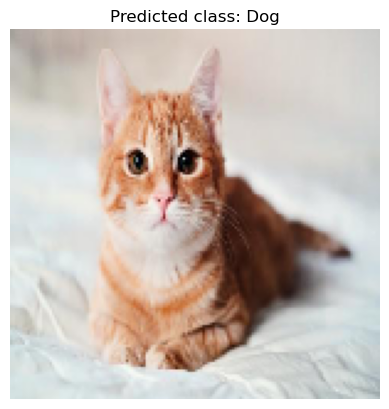

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the trained SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_model.fit(train_features_vgg, train_labels)

# Function to predict class for a single image
def predict_image_class(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using the pre-trained VGG16 model
    features = base_model_vgg16.predict(img_array)

    # Flatten the features
    features = np.reshape(features, (features.shape[0], -1))

    # Predict the class using the SVM model
    predicted_class = model.predict(features)[0]

    return predicted_class

# Function to display the predicted class and input image
def display_prediction(image_path, model):
    predicted_class = predict_image_class(image_path, model)
    if predicted_class == 1:
        prediction_label = "Dog"
    else:
        prediction_label = "Cat"
    
    # Load and display the input image
    img = image.load_img(image_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title("Predicted class: " + prediction_label)
    plt.axis('off')
    plt.show()

# Path to the image you want to classify
image_path = r"C:\Users\HP\Downloads\archive (1)\test\cats\cat_158.jpg"

# Display the predicted class and input image
display_prediction(image_path, svm_model)
